In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture

In [346]:
data_raw = pd.read_csv('C:/Users/Kate/Downloads/arrhythmia.data',header=0,sep=',')

In [347]:
data_raw.shape

(452, 280)

In [348]:
data_raw.iloc[:6,:10]

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS
0,56,1,165,64,81,174,401,149,39,25
1,54,0,172,95,138,163,386,185,102,96
2,55,0,175,94,100,202,380,179,143,28
3,75,0,190,80,88,181,360,177,103,-16
4,13,0,169,51,100,167,321,174,91,107
5,40,1,160,52,77,129,377,133,77,77


In [349]:
data_raw.tail()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1
452,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8


In [350]:
data_raw.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            442, 443, 444, 445, 446, 447, 448, 449, 450, 452],
           dtype='int64', length=452)

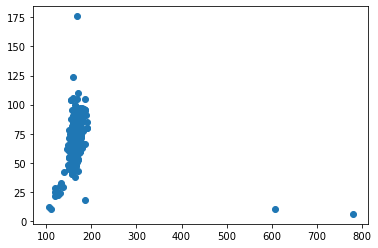

In [351]:
plt.scatter(data_raw['Height'], data_raw['Weight'])
pass

In [352]:
data_raw['Height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    119.255
0.010    122.040
0.050    150.000
0.100    155.000
0.500    164.000
0.900    175.000
0.950    178.000
0.990    188.980
0.995    190.000
Name: Height, dtype: float64

In [353]:
data_raw['Weight'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     10.51
0.010     19.53
0.050     45.00
0.100     52.00
0.500     68.00
0.900     86.00
0.950     94.00
0.990    105.00
0.995    108.98
Name: Weight, dtype: float64

In [354]:
data = data_raw

In [355]:
data_raw.loc[
    (data_raw['Height'] < data_raw['Height'].quantile(0.005)) | (data_raw['Height'] > data_raw['Height'].quantile(0.995)),'Height'] = data_raw['Height'].median(axis = 0)

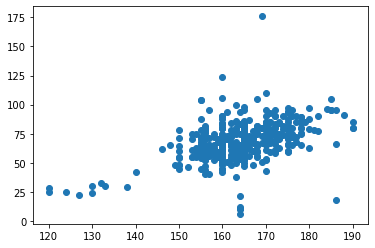

In [356]:
plt.scatter(data_raw['Height'], data_raw['Weight'])
pass

In [357]:
data_raw.loc[
    (data_raw['Weight'] < data_raw['Weight'].quantile(0.005)) | (data_raw['Weight'] > data_raw['Weight'].quantile(0.995)),'Weight'] = data_raw['Weight'].median(axis = 0)

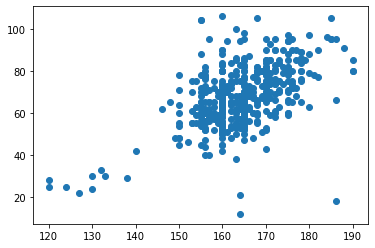

In [358]:
plt.scatter(data_raw['Height'], data_raw['Weight'])
pass

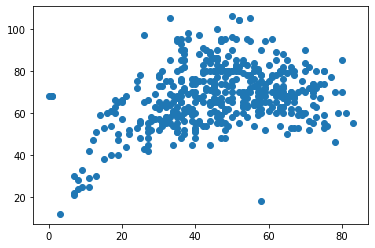

In [359]:
plt.scatter(data['Age'],data['Weight'])

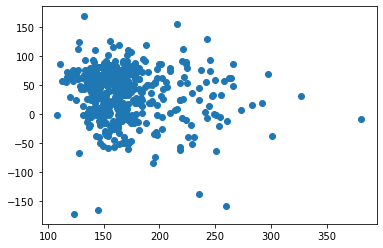

In [360]:
plt.scatter(data['T interval'], data['QRS'])

In [361]:
data.shape[0]

452

In [362]:
447/72

6.208333333333333

In [363]:
slice1 = data.iloc[:,:10]

In [364]:
#sns.pairplot(data.iloc[random_subset], hue='Age', diag_kind='hist')
#plt.legend()

In [365]:
slice1

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS
0,56,1,165.0,64.0,81,174,401,149,39,25
1,54,0,172.0,95.0,138,163,386,185,102,96
2,55,0,175.0,94.0,100,202,380,179,143,28
3,75,0,190.0,80.0,88,181,360,177,103,-16
4,13,0,169.0,51.0,100,167,321,174,91,107
...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86
448,36,0,166.0,68.0,108,176,365,194,116,-85
449,32,1,155.0,55.0,93,106,386,218,63,54
450,78,1,160.0,70.0,79,127,364,138,78,28


In [366]:
#np.random.seed(42)
#random_subset = np.random.choice(np.arange(slice1.shape[0]), size=200, replace=False)
#sns.pairplot(slice1.iloc[random_subset], hue='Age', diag_kind='hist')
#plt.legend()

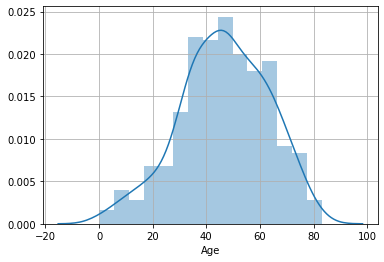

In [367]:
sns.distplot(data['Age'], bins=15)
plt.grid()
pass

In [368]:
corr_mat = data.corr()
corr_mat

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"R(Ampl,of channel V5)","S(Ampl,of channel V5)","T(Ampl,of channel V5)","QRSA(Ampl,of channel V5)","QRSTA(Ampl,of channel V5)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
Age,1.000000,-0.059042,0.165797,0.334274,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,-0.177121,0.030463,-0.256627,-0.072094,-0.227229,-0.158009,0.082376,0.018043,-0.199728,-0.092381
Sex,-0.059042,1.000000,-0.546724,-0.286905,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,-0.203435,0.215832,-0.027394,0.021588,-0.024504,-0.042638,0.092879,0.031688,0.046605,-0.178080
Height,0.165797,-0.546724,1.000000,0.546290,0.061943,0.080247,-0.008627,0.049786,0.116811,-0.113511,...,0.046329,-0.014610,0.009821,0.036525,0.030714,-0.018388,0.063363,0.042630,-0.004298,-0.018033
Weight,0.334274,-0.286905,0.546290,1.000000,0.070009,0.143466,0.078499,0.133903,0.138480,-0.153777,...,-0.092792,-0.026137,-0.142127,-0.049649,-0.129056,-0.078452,0.011031,0.019334,-0.099057,-0.079934
QRS duration,-0.004032,-0.337101,0.061943,0.070009,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,0.070543,-0.279070,-0.055768,-0.077276,-0.061721,0.091384,-0.228688,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R(Ampl,of channel V6)",-0.158009,-0.042638,-0.018388,-0.078452,0.091384,0.003411,0.121349,0.070535,0.007886,0.292155,...,0.879162,-0.052481,0.096861,0.665484,0.511562,1.000000,0.016345,0.671383,0.560374,0.036188
"S(Ampl,of channel V6)",0.082376,0.092879,0.063363,0.011031,-0.228688,-0.074180,0.116718,-0.046868,-0.091258,0.295283,...,-0.011459,0.810099,0.032699,0.474834,0.336019,0.016345,1.000000,0.562825,0.341484,-0.071556
"QRSA(Ampl,of channel V6)",0.018043,0.031688,0.042630,0.019334,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.508926,0.445921,0.003682,0.813504,0.549813,0.671383,0.562825,1.000000,0.611219,0.003476
"QRSTA(Ampl,of channel V6)",-0.199728,0.046605,-0.004298,-0.099057,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.448430,0.297362,0.676655,0.583441,0.881998,0.560374,0.341484,0.611219,1.000000,-0.009275


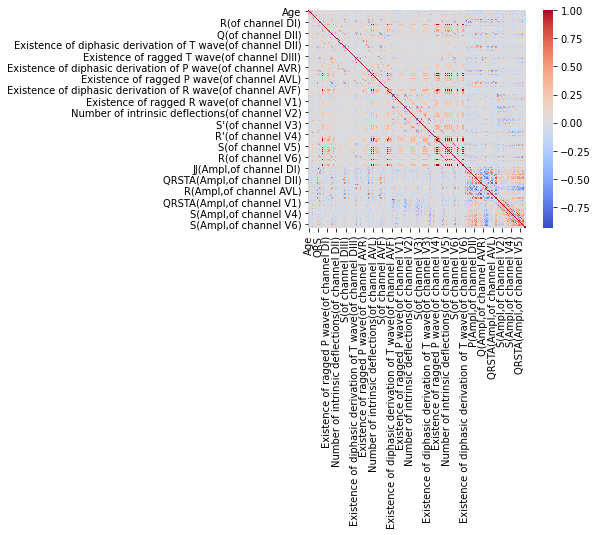

In [369]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [370]:
corr_mat > 0.5

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"R(Ampl,of channel V5)","S(Ampl,of channel V5)","T(Ampl,of channel V5)","QRSA(Ampl,of channel V5)","QRSTA(Ampl,of channel V5)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
Age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sex,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Height,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Weight,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
QRS duration,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R(Ampl,of channel V6)",False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,False,True,True,False
"S(Ampl,of channel V6)",False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
"QRSA(Ampl,of channel V6)",False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False
"QRSTA(Ampl,of channel V6)",False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,True,True,False


In [371]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1))

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"R(Ampl,of channel V5)","S(Ampl,of channel V5)","T(Ampl,of channel V5)","QRSA(Ampl,of channel V5)","QRSTA(Ampl,of channel V5)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,NaN,NaN,NaN,0.54629,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QRS duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R(Ampl,of channel V6)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671383,0.560374,NaN
"S(Ampl,of channel V6)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562825,NaN,NaN
"QRSA(Ampl,of channel V6)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611219,NaN
"QRSTA(Ampl,of channel V6)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
data['R\'(Ampl,of channel V6)'].unique()

array(['0.0', '0.5', '0.8', '0.0.39'], dtype=object)

In [373]:
data['S\'(Ampl,of channel V6)'].unique()

array(['0.0', '0.0.40'], dtype=object)

In [374]:
data['J'].unique()

array(['?', '23', '84', '160', '-93', '154', '-144', '-112', '177', '-89',
       '175', '-95', '-163', '-33', '36', '-18', '-164', '-108', '-121',
       '178', '-167', '161', '-39', '169', '-157', '-118', '-117', '-57',
       '-153', '164', '-132', '-137', '-158', '132', '139', '-179',
       '-150', '86', '-126', '-109', '151', '33', '-87', '-122', '114',
       '-168', '74', '-119', '91', '123', '144', '-113', '-162', '141',
       '-105', '-166', '-169', '116', '153', '176', '128', '-148', '121',
       '13', '62', '-124', '103', '-84', '-44', '-90'], dtype=object)

In [375]:
data['S\'(Ampl,of channel V6)'].value_counts() 

0.0       451
0.0.40      1
Name: S'(Ampl,of channel V6), dtype: int64

In [376]:
data['S\'(Ampl,of channel V2)'].value_counts() 

0.0       448
-2.1        1
-4.0        1
-1.1        1
0.0.28      1
Name: S'(Ampl,of channel V2), dtype: int64

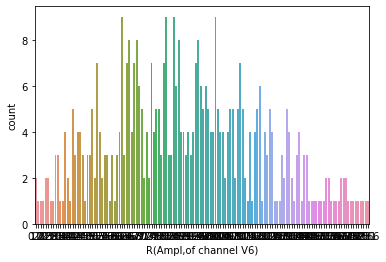

In [377]:
sns.countplot(x='R(Ampl,of channel V6)', data=data)
pass

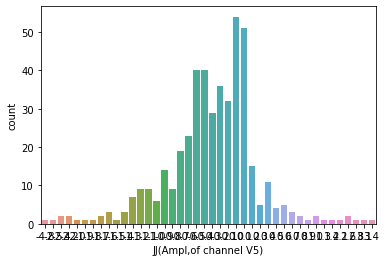

In [378]:
sns.countplot(x='JJ(Ampl,of channel V5)', data=data)
pass

In [379]:
data.isna().sum()  

Age                          0
Sex                          0
Height                       0
Weight                       0
QRS duration                 0
                            ..
P(Ampl,of channel V6)        0
T(Ampl,of channel V6)        0
QRSA(Ampl,of channel V6)     0
QRSTA(Ampl,of channel V6)    0
8                            0
Length: 280, dtype: int64

In [380]:
data[data == '?'] = np.NaN

C:\Users\Kate\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [381]:
with pd.option_context("display.max_rows", 1000):
    display(data.isna().sum())

Age                                                              0
Sex                                                              0
Height                                                           0
Weight                                                           0
QRS duration                                                     0
P-R interval                                                     0
Q-T interval                                                     0
T interval                                                       0
P interval                                                       0
QRS                                                              0
T                                                                8
P                                                               22
QRST                                                             1
J                                                              376
Heart rate                                                    

In [382]:
data.isna().sum()  

Age                          0
Sex                          0
Height                       0
Weight                       0
QRS duration                 0
                            ..
P(Ampl,of channel V6)        0
T(Ampl,of channel V6)        0
QRSA(Ampl,of channel V6)     0
QRSTA(Ampl,of channel V6)    0
8                            0
Length: 280, dtype: int64

In [383]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [384]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
'''median_i = data['T'].median(axis = 0)
print(median_i) 
for i in data.columns:
    median_i = data[i].median(axis = 0) 
    data[i] = data[i].mask(data[i] == '?',median_i) '''

"median_i = data['T'].median(axis = 0)\nprint(median_i) \nfor i in data.columns:\n    median_i = data[i].median(axis = 0) \n    data[i] = data[i].mask(data[i] == '?',median_i) "

In [385]:
data.loc[:3,'J']

0   -50.5
1      23
2   -50.5
3   -50.5
Name: J, dtype: object

In [386]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",8
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [387]:
data.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS',
       ...
       'Q(Ampl,of channel V6)', 'R(Ampl,of channel V6)',
       'S(Ampl,of channel V6)', 'R'(Ampl,of channel V6)',
       'S'(Ampl,of channel V6)', 'P(Ampl,of channel V6)',
       'T(Ampl,of channel V6)', 'QRSA(Ampl,of channel V6)',
       'QRSTA(Ampl,of channel V6)', '8'],
      dtype='object', length=280)

In [388]:
data.rename(columns={'8': 'class'},inplace = True)

In [389]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [390]:
with pd.option_context("display.max_rows", 1000):
    display(data.dtypes)

Age                                                              int64
Sex                                                              int64
Height                                                         float64
Weight                                                         float64
QRS duration                                                     int64
P-R interval                                                     int64
Q-T interval                                                     int64
T interval                                                       int64
P interval                                                       int64
QRS                                                              int64
T                                                               object
P                                                               object
QRST                                                            object
J                                                               object
Heart 

In [391]:
dict(data.dtypes)

{'Age': dtype('int64'),
 'Sex': dtype('int64'),
 'Height': dtype('float64'),
 'Weight': dtype('float64'),
 'QRS duration': dtype('int64'),
 'P-R interval': dtype('int64'),
 'Q-T interval': dtype('int64'),
 'T interval': dtype('int64'),
 'P interval': dtype('int64'),
 'QRS': dtype('int64'),
 'T': dtype('O'),
 'P': dtype('O'),
 'QRST': dtype('O'),
 'J': dtype('O'),
 'Heart rate': dtype('O'),
 'Q(of channel DI)': dtype('float64'),
 'R(of channel DI)': dtype('int64'),
 'S(of channel DI)': dtype('int64'),
 "R'(of channel DI)": dtype('float64'),
 "S'(of channel DI)": dtype('float64'),
 'Number of intrinsic deflections(of channel DI)': dtype('int64'),
 'Existence of ragged R wave(of channel DI)': dtype('float64'),
 'Existence of diphasic derivation of R wave(of channel DI)': dtype('float64'),
 'Existence of ragged P wave(of channel DI)': dtype('float64'),
 'Existence of diphasic derivation of P wave(of channel DI)': dtype('float64'),
 'Existence of ragged T wave(of channel DI)': dtype('float6

In [392]:
data['Age'].dtypes
cols_to_change = [x for x in data.columns if data[x].dtype=='O']
print(cols_to_change[0])

T


In [393]:
data.rename(index={452:451 },inplace = True)

In [394]:
with pd.option_context("display.max_columns", 1000):
    display(data.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            442, 443, 444, 445, 446, 447, 448, 449, 450, 451],
           dtype='int64', length=452)

In [395]:
data.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS',
       ...
       'Q(Ampl,of channel V6)', 'R(Ampl,of channel V6)',
       'S(Ampl,of channel V6)', 'R'(Ampl,of channel V6)',
       'S'(Ampl,of channel V6)', 'P(Ampl,of channel V6)',
       'T(Ampl,of channel V6)', 'QRSA(Ampl,of channel V6)',
       'QRSTA(Ampl,of channel V6)', 'class'],
      dtype='object', length=280)

In [396]:
data.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS',
       ...
       'Q(Ampl,of channel V6)', 'R(Ampl,of channel V6)',
       'S(Ampl,of channel V6)', 'R'(Ampl,of channel V6)',
       'S'(Ampl,of channel V6)', 'P(Ampl,of channel V6)',
       'T(Ampl,of channel V6)', 'QRSA(Ampl,of channel V6)',
       'QRSTA(Ampl,of channel V6)', 'class'],
      dtype='object', length=280)

In [401]:
data[data == '0.0.12'] = np.NaN
data[data == '0.0.13'] = np.NaN
data[data == '0.0.14'] = np.NaN
data[data == '0.0.15'] = np.NaN
data[data == '0.0.16'] = np.NaN
data[data == '0.0.17'] = np.NaN
data[data == '0.0.18'] = np.NaN
data[data == '0.0.19'] = np.NaN
data[data == '0.0.20'] = np.NaN
data[data == '0.0.21'] = np.NaN
data[data == '0.0.22'] = np.NaN
data[data == '0.0.23'] = np.NaN
data[data == '0.0.24'] = np.NaN
data[data == '0.0.25'] = np.NaN
data[data == '0.0.26'] = np.NaN
data[data == '0.0.27'] = np.NaN
data[data == '0.0.28'] = np.NaN
data[data == '0.0.29'] = np.NaN
data[data == '0.0.30'] = np.NaN
data[data == '0.0.31'] = np.NaN
data[data == '0.0.32'] = np.NaN
data[data == '0.0.33'] = np.NaN
data[data == '0.0.34'] = np.NaN
data[data == '0.0.35'] = np.NaN
data[data == '0.0.36'] = np.NaN
data[data == '0.0.37'] = np.NaN
data[data == '0.0.38'] = np.NaN
data[data == '0.0.39'] = np.NaN
data[data == '0.0.40'] = np.NaN
data[data == '0.0.41'] = np.NaN
data[data == '0.0.42'] = np.NaN
data[data == '0.0.43'] = np.NaN
data[data == '0.0.44'] = np.NaN
data[data == '0.0.45'] = np.NaN
data[data == '0.0.46'] = np.NaN
data[data == '0.0.47'] = np.NaN
data[data == '0.0.48'] = np.NaN
data[data == '0.0.49'] = np.NaN
data[data == '0.0.50'] = np.NaN
data[data == '0.0.51'] = np.NaN
data[data == '0.0.52'] = np.NaN
data[data == '0.0.53'] = np.NaN

data[data == '0.0.1'] = np.NaN
data[data == '0.0.2'] = np.NaN
data[data == '0.0.3'] = np.NaN
data[data == '0.0.4'] = np.NaN
data[data == '0.0.5'] = np.NaN
data[data == '0.0.6'] = np.NaN
data[data == '0.0.7'] = np.NaN
data[data == '0.0.8'] = np.NaN
data[data == '0.0.9'] = np.NaN
data[data == '0.0.10'] = np.NaN
data[data == '0.0.11'] = np.NaN


data[data == '-1.0.2'] = np.NaN
data[data == '0.8.2'] = np.NaN
data[data=='0.4.1'] = np.NaN
data[data == '0.4.2'] = np.NaN
data[data=='0.1.1'] = np.NaN

data[data=='0.8.1'] = np.NaN
data[data=='-0.8.1'] = np.NaN

data[data == '0.1.2'] = np.NaN
data[data == '0.2.1'] = np.NaN
data[data == '-0.1.1'] = np.NaN
data[data == '0.6.3'] = np.NaN
data[data == '-3.9.1'] = np.NaN
data[data == '15.2.1'] = np.NaN
data[data == '0.9.1'] = np.NaN
data[data == '0.9.2'] = np.NaN
data[data == '-0.3.1'] = np.NaN
data[data == '0.9.3'] = np.NaN
data[data == '2.9.1'] = np.NaN
data[data=='0.6.1'] = np.NaN
data[data == '-1.0.1'] = np.NaN
data[data=='0.6.2'] = np.NaN
data[data=='-0.6.1'] = np.NaN



In [402]:
#data[451,'T'] = data['T'].median(axis=0)
for i in cols_to_change:
    data[i].to_frame()
    data[i] = pd.to_numeric(data[i])    
    print(data[i].dtypes, i)
#for x in cols_to_change

float64 T
float64 P
float64 QRST
float64 J
float64 Heart rate
float64 R'(Ampl,of channel DI)
float64 S'(Ampl,of channel DI)
float64 P(Ampl,of channel DI)
float64 JJ(Ampl,of channel DII)
float64 Q(Ampl,of channel DII)
float64 S(Ampl,of channel DII)
float64 R'(Ampl,of channel DII)
float64 S'(Ampl,of channel DII)
float64 JJ(Ampl,of channel DIII)
float64 S(Ampl,of channel DIII)
float64 R'(Ampl,of channel DIII)
float64 S'(Ampl,of channel DIII)
float64 P(Ampl,of channel DIII)
float64 JJ(Ampl,of channel AVR)
float64 R(Ampl,of channel AVR)
float64 S(Ampl,of channel AVR)
float64 R'(Ampl,of channel AVR)
float64 S'(Ampl,of channel AVR)
float64 JJ(Ampl,of channel AVL)
float64 Q(Ampl,of channel AVL)
float64 S(Ampl,of channel AVL)
float64 R'(Ampl,of channel AVL)
float64 S'(Ampl,of channel AVL)
float64 JJ(Ampl,of channel AVF)
float64 R(Ampl,of channel AVF)
float64 S(Ampl,of channel AVF)
float64 R'(Ampl,of channel AVF)
float64 S'(Ampl,of channel AVF)
float64 T(Ampl,of channel AVF)
float64 JJ(Ampl,of c

In [403]:
data_raw['T']

0      37.0
1      34.0
2      11.0
3      13.0
4      66.0
       ... 
447    66.0
448   -19.0
449    29.0
450    79.0
451    13.0
Name: T, Length: 452, dtype: float64

In [404]:
with pd.option_context("display.max_rows", 1000):
    display(data.isna().sum())

Age                                                            0
Sex                                                            0
Height                                                         0
Weight                                                         0
QRS duration                                                   0
P-R interval                                                   0
Q-T interval                                                   0
T interval                                                     0
P interval                                                     0
QRS                                                            0
T                                                              0
P                                                              0
QRST                                                           0
J                                                              0
Heart rate                                                     0
Q(of channel DI)         

In [405]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
with pd.option_context("display.max_rows", 1000):
    display(data.isna().sum())

Age                                                            0
Sex                                                            0
Height                                                         0
Weight                                                         0
QRS duration                                                   0
P-R interval                                                   0
Q-T interval                                                   0
T interval                                                     0
P interval                                                     0
QRS                                                            0
T                                                              0
P                                                              0
QRST                                                           0
J                                                              0
Heart rate                                                     0
Q(of channel DI)         

In [406]:
data.dtypes

Age                            int64
Sex                            int64
Height                       float64
Weight                       float64
QRS duration                   int64
                              ...   
P(Ampl,of channel V6)        float64
T(Ampl,of channel V6)        float64
QRSA(Ampl,of channel V6)     float64
QRSTA(Ampl,of channel V6)    float64
class                          int64
Length: 280, dtype: object

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=25, random_state=241)
disease = data.drop('class', axis=1)
disease_labels = data['class'].copy()

In [409]:
print(disease.shape)
print(disease_labels.shape) 

(452, 279)
(452,)


In [410]:
train_set, test_set = train_test_split(disease, test_size=0.2, random_state=42)

In [411]:
print(train_set.shape)
print(test_set.shape)

(361, 279)
(91, 279)


In [412]:
train_labels = disease_labels.iloc[train_set.index].to_frame()
print(train_set.shape)
print(train_labels.shape)
#print(train_set)
print(train_labels)

(361, 279)
(361, 1)
     class
24      16
17       1
66       1
301      6
356      2
..     ...
106      1
270      1
348      1
435      1
102      1

[361 rows x 1 columns]


In [413]:
forest_clf.fit(train_set,train_labels)

<ipython-input-413-fbb585c92582>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(train_set,train_labels)


RandomForestClassifier(n_estimators=25, random_state=241)

In [414]:
forest_clf.predict(disease.loc[[8],])

array([10], dtype=int64)

In [415]:
data.loc[[8],]

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
8,50,1,167.0,67.0,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [416]:
forest_clf.predict_proba(disease.loc[[8],])

array([[0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.88, 0.  ,
        0.  , 0.  ]])

In [417]:
cross_val_score(forest_clf, train_set, train_labels, cv=3, scoring="accuracy")

C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

array([0.70247934, 0.70833333, 0.70833333])

In [418]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set.astype(np.float64))

In [419]:
cross_val_score(forest_clf, train_set_scaled, train_labels, cv=3, scoring="accuracy")

C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kate\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

array([0.70247934, 0.725     , 0.69166667])

In [420]:
test_labels = disease_labels.iloc[test_set.index].to_frame()
#print(train_set)
print(test_labels)

     class
299     15
39       1
336      1
332      1
153     16
..     ...
447     10
137      1
93      10
57       6
192      2

[91 rows x 1 columns]


In [421]:
forest_clf.predict(test_set)

array([ 2,  1,  1,  1,  1,  6, 10,  2,  1,  1,  1,  1,  5,  1,  3,  1,  1,
        1,  1,  4,  1,  1,  1,  1,  1,  2,  1, 10,  1,  1,  2,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  3,  1,  3,  1,  1,  3,  1,  1,  2, 10,  1,
        1,  2, 10,  1,  1, 10,  1, 10,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       10, 16,  1, 10,  1, 10,  1,  1,  1, 10,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1, 10,  2,  2], dtype=int64)

In [422]:
forest_clf.predict_proba(test_set)

array([[0.08, 0.36, 0.04, ..., 0.04, 0.  , 0.04],
       [0.8 , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.44, 0.04, 0.  , ..., 0.  , 0.04, 0.04],
       ...,
       [0.12, 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.16, 0.48, 0.  , ..., 0.  , 0.  , 0.04],
       [0.2 , 0.68, 0.  , ..., 0.  , 0.04, 0.  ]])

In [423]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [424]:
data.to_csv('C:/Users/Kate/Downloads/arrh2',sep=',',header=True,index=None)

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/Kate/Desktop/Core_paper/arrh2',sep=',')

In [6]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,"Q(Ampl,of channel V6)","R(Ampl,of channel V6)","S(Ampl,of channel V6)","R'(Ampl,of channel V6)","S'(Ampl,of channel V6)","P(Ampl,of channel V6)","T(Ampl,of channel V6)","QRSA(Ampl,of channel V6)","QRSTA(Ampl,of channel V6)",class
0,56,1,165.0,64.0,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172.0,95.0,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175.0,94.0,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190.0,80.0,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169.0,51.0,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,37,0,190.0,85.0,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166.0,68.0,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155.0,55.0,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160.0,70.0,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1
